##  Customer Segmentation Analysis

### 2. Load the dataset into the tool.

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [128]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [129]:
df.shape

(200, 5)

In [130]:
df.columns = [ "CustomerID" , "Gender" , "Age" , "AnnualIncome" , "SpendingScore" ]
df.drop ( columns = [ "CustomerID" ] , inplace = True )

In [131]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [132]:
df.shape

(200, 4)

### 3. Perform Below Visualizations.

####  i) Univariate Analysis

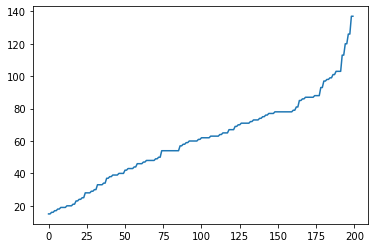

In [133]:
plt.plot(df.AnnualIncome)

#### ii) Bi- Variate Analysis

D:\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


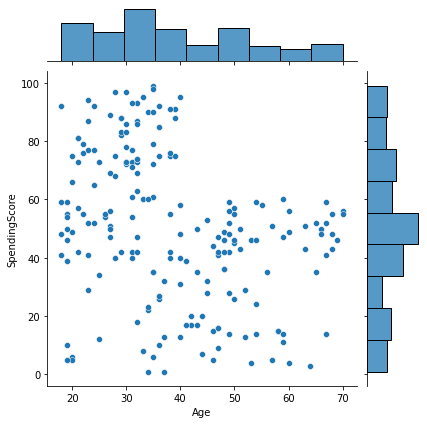

In [134]:
sns.jointplot(df.Age,df.SpendingScore)
plt.show()

#### iii)Multi-Variate Analysis

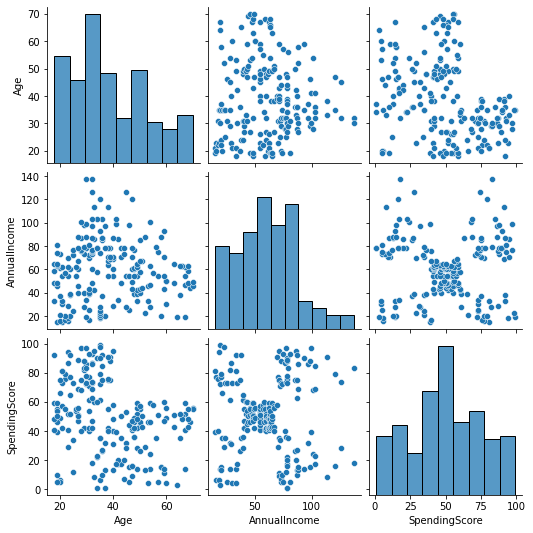

In [135]:
sns.pairplot(df)

### 4. Perform descriptive statistics on the dataset.

In [136]:
df.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### 5. Check for Missing values and deal with them.

In [137]:
df.isnull().sum()

Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

### 6. Find the outliers and replace them outliers

D:\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

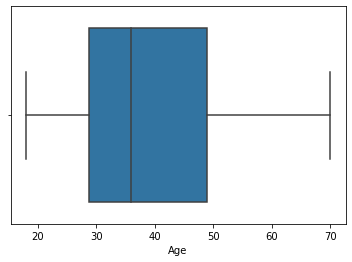

In [138]:
sns.boxplot(df.Age)

D:\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AnnualIncome'>

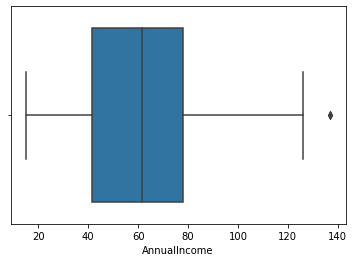

In [139]:
sns.boxplot(df.AnnualIncome)

D:\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SpendingScore'>

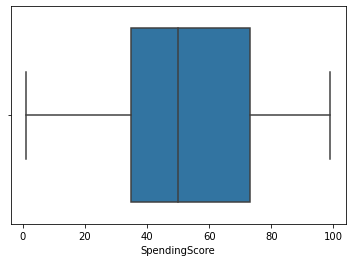

In [140]:
sns.boxplot(df.SpendingScore)

In [141]:
p99=df.AnnualIncome.quantile(.99)
p99

126.1099999999999

In [142]:
df['AnnualIncome']=np.where(df['AnnualIncome']>p99,p99,df['AnnualIncome'])

D:\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AnnualIncome'>

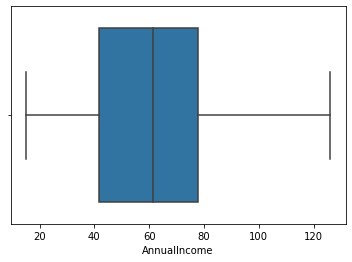

In [143]:
sns.boxplot(df.AnnualIncome)

### 7. Check for Categorical columns and perform encoding.

In [144]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [145]:
df.Gender=le.fit_transform(df.Gender)
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


### 8. Scaling the data

In [146]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [147]:
dfscaled=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
dfscaled.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1.0,0.019231,0.000,0.387755
1,1.0,0.057692,0.000,0.816327
2,0.0,0.038462,0.009,0.051020
3,0.0,0.096154,0.009,0.775510
4,0.0,0.250000,0.018,0.397959


### 9. Perform any of the clustering algorithms

In [148]:
from sklearn import cluster

In [149]:
error=[]
for i in range(1,15):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(dfscaled)
    error.append(kmeans.inertia_)

D:\Anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

In [150]:
error

[88.32732686560692,
 38.917720543638254,
 31.26877470963097,
 24.036006946598846,
 20.531319465343856,
 17.537959674200287,
 15.093012172474253,
 12.820270787214906,
 11.1191731120412,
 9.795501557418575,
 8.799306558312036,
 8.104289419716354,
 7.396527700846332,
 6.793483643796583]

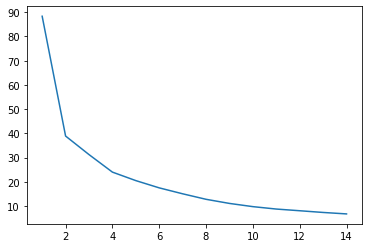

In [151]:
plt.plot(range(1,15),error)

In [152]:
kmmodel=cluster.KMeans(n_clusters=7,init='k-means++',random_state=0)

In [153]:
kmmodel.fit(dfscaled)

D:\Anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [154]:
TargetCustomers=kmmodel.predict(dfscaled)
TargetCustomers

array([6, 6, 4, 4, 4, 4, 2, 4, 5, 4, 5, 4, 2, 4, 5, 6, 4, 6, 5, 4, 6, 6,
       2, 6, 2, 6, 2, 6, 2, 4, 5, 4, 5, 6, 2, 4, 2, 4, 2, 4, 2, 6, 5, 4,
       2, 4, 2, 4, 4, 4, 2, 6, 4, 5, 2, 5, 2, 5, 4, 5, 5, 6, 2, 2, 5, 6,
       2, 2, 6, 4, 5, 2, 2, 2, 5, 6, 2, 6, 4, 2, 5, 6, 5, 2, 4, 5, 2, 4,
       4, 2, 2, 6, 5, 2, 4, 6, 2, 4, 5, 6, 4, 2, 5, 6, 5, 4, 2, 5, 5, 5,
       5, 4, 2, 6, 4, 4, 2, 2, 2, 2, 6, 2, 2, 1, 4, 0, 3, 1, 5, 1, 3, 1,
       4, 0, 3, 0, 2, 1, 3, 0, 2, 1, 4, 0, 3, 1, 3, 0, 2, 1, 3, 1, 2, 0,
       2, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 2, 1, 3, 1, 3, 1, 2, 0,
       3, 1, 3, 1, 2, 0, 3, 0, 2, 1, 2, 1, 2, 0, 2, 0, 3, 0, 2, 0, 2, 1,
       3, 1])

### 10. Add the cluster data with the primary dataset

In [155]:
dfscaled.insert(loc=4,column='TargetCustomers',value=TargetCustomers)

In [156]:
dfscaled.head()

,Gender,Age,AnnualIncome,SpendingScore,TargetCustomers
0,1.0,0.019231,0.000,0.387755,6
1,1.0,0.057692,0.000,0.816327,6
2,0.0,0.038462,0.009,0.051020,4
3,0.0,0.096154,0.009,0.775510,4
4,0.0,0.250000,0.018,0.397959,4


### 11. Split the data into dependent and independent variables.

In [157]:
x=dfscaled.iloc[:,:-1]
x.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1.0,0.019231,0.000,0.387755
1,1.0,0.057692,0.000,0.816327
2,0.0,0.038462,0.009,0.051020
3,0.0,0.096154,0.009,0.775510
4,0.0,0.250000,0.018,0.397959


In [158]:
y=dfscaled.TargetCustomers
y.head()

0    6
1    6
2    4
3    4
4    4
Name: TargetCustomers, dtype: int32

### 12. Split the data into training and testing

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### 13. Build the Model

D:\Anacondaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AnnualIncome', ylabel='TargetCustomers'>

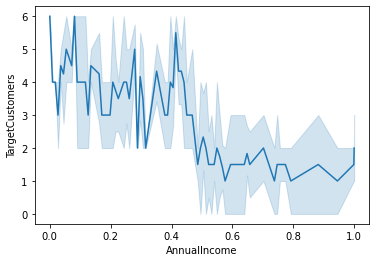

In [160]:
sns.lineplot(dfscaled.AnnualIncome,dfscaled.TargetCustomers)

In [161]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

### 14. Train the Model

In [162]:
model.fit(x_train,y_train)

LogisticRegression()

In [163]:
train_pred=model.predict(x_train)
train_pred

array([3, 2, 2, 6, 2, 2, 5, 6, 2, 0, 2, 4, 2, 4, 1, 2, 5, 2, 2, 2, 1, 2,
       0, 4, 0, 5, 2, 0, 6, 2, 0, 2, 6, 2, 3, 2, 5, 6, 6, 1, 1, 2, 3, 0,
       5, 2, 4, 5, 2, 1, 4, 5, 2, 2, 2, 5, 0, 5, 2, 2, 3, 0, 2, 6, 2, 5,
       6, 5, 0, 6, 4, 4, 4, 5, 4, 0, 6, 2, 0, 6, 6, 4, 5, 4, 4, 2, 4, 2,
       3, 3, 2, 6, 4, 2, 0, 1, 3, 6, 1, 4, 2, 5, 4, 5, 6, 6, 6, 3, 5, 4,
       4, 1, 6, 2, 4, 5, 0, 5, 2, 2, 4, 1, 4, 3, 1, 5, 5, 4, 1, 0, 4, 6,
       5, 2, 4, 2, 0, 2, 6, 6, 0, 6, 2, 2, 2, 4, 4, 2, 4, 5, 4, 2, 6, 4,
       6, 2, 3, 2, 4, 3])

### 15. Test the Model

In [164]:
test_pred=model.predict(x_test)
test_pred

array([5, 3, 5, 5, 1, 3, 4, 5, 2, 2, 6, 4, 2, 2, 5, 4, 6, 3, 4, 5, 0, 1,
       4, 0, 5, 1, 1, 1, 2, 2, 4, 5, 3, 4, 2, 0, 1, 4, 2, 2])

### 16. Measure the performance using Evaluation Metrics.

In [165]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [166]:
print('test accuracy score: ',accuracy_score(y_test,test_pred))
print('train accuracy score: ',accuracy_score(y_train,train_pred))

test accuracy score:  0.95
train accuracy score:  0.95625


In [167]:
pd.crosstab(y_test,test_pred)

col_0,0,1,2,3,4,5,6
TargetCustomers,,,,,,,
0,3,0,0,0,1,0,0
1,0,6,0,0,0,0,0
2,0,0,9,0,0,0,0
3,0,0,0,4,0,1,0
4,0,0,0,0,7,0,0
5,0,0,0,0,0,7,0
6,0,0,0,0,0,0,2


In [168]:
pd.crosstab(y_train,train_pred)

col_0,0,1,2,3,4,5,6
TargetCustomers,,,,,,,
0,16,0,0,0,1,0,0
1,0,11,0,0,0,0,1
2,0,0,45,0,0,0,0
3,0,0,0,11,0,3,0
4,0,0,1,0,29,0,0
5,0,0,0,0,0,19,1
6,0,0,0,0,0,0,22
